In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)
%matplotlib inline

In [12]:
data = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

In [13]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [14]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2183130,185,CASH_OUT,20104.67,C202089078,109.0,0.0,C1620942358,415428.69,435533.36,0.0,0.0
2183131,185,PAYMENT,49575.39,C701976194,0.0,0.0,M1991806503,0.00,0.00,0.0,0.0
2183132,185,PAYMENT,5744.31,C972686201,0.0,0.0,M1748176418,0.00,0.00,0.0,0.0
2183133,185,PAYMENT,7190.95,C2072243960,0.0,0.0,M1232637465,0.00,0.00,0.0,0.0
2183134,185,PAYMENT,2723.29,C544259460,0.0,0.0,M1346561462,NaN,NaN,NaN,NaN


In [15]:

# get information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183135 entries, 0 to 2183134
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 183.2+ MB


In [16]:
# drop usless features
data.drop(["step","nameOrig","nameDest"],axis=1,inplace=True)

In [17]:
# Check the null values
data.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [18]:
# drop null values
data.dropna(inplace=True)

In [19]:
# check  duplicated values
data.duplicated().sum()

12695

In [20]:
## drop Duplicet  values
data.drop_duplicates(inplace=True)

In [21]:
# saprate numerical and catigorical data
catigorical_features = data.select_dtypes(include = "object").columns
numerical_features = data.select_dtypes(exclude = "object").columns
print(catigorical_features)
print(numerical_features)

Index(['type'], dtype='object')
Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [22]:
# det 5 numbar summary of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,2170439.0,1.624640e+05,2.698914e+05,0.06,13495.61,80216.18,218222.410,10000000.00
oldbalanceOrg,2170439.0,8.579542e+05,2.930476e+06,0.00,0.00,15238.00,121000.980,38939424.03
newbalanceOrig,2170439.0,8.795757e+05,2.966862e+06,0.00,0.00,0.00,163768.395,38946233.02
oldbalanceDest,2170439.0,1.004167e+06,2.312203e+06,0.00,0.00,145264.52,959579.455,42283775.08
newbalanceDest,2170439.0,1.121466e+06,2.403883e+06,0.00,0.00,236297.70,1161438.250,42655769.20
isFraud,2170439.0,9.624781e-04,3.100890e-02,0.00,0.00,0.00,0.000,1.00
isFlaggedFraud,2170439.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.000,0.00


In [23]:
# check unique value of type
data["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: ylabel='isFraud'>

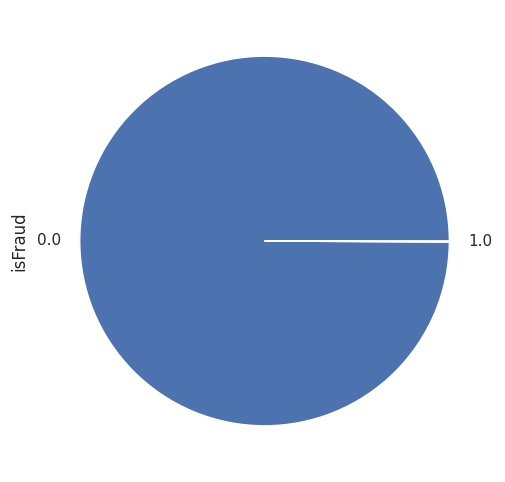

In [24]:
# now check the target colum value couts
data["isFraud"].value_counts().plot.pie()
# immbalance data we have to balance this data fead to our ann model

<Axes: >

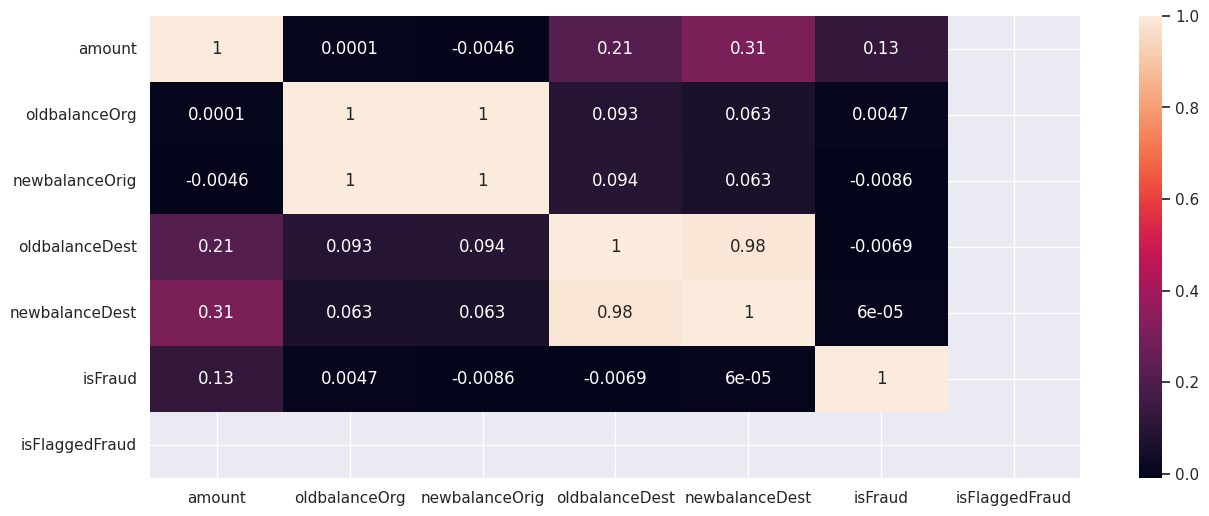

In [25]:
# get gorelation of data using heatmap
sns.heatmap(data.corr(),annot=True)

In [26]:
Fraud = pd.crosstab(data["type"],data["isFraud"])
Fraud

isFraud,0.0,1.0
type,,
CASH_IN,481024,0
CASH_OUT,778881,1050
DEBIT,14394,0
PAYMENT,714060,0
TRANSFER,179991,1039


In [27]:
# Model Buelding
data.drop("isFlaggedFraud",axis=1,inplace=True)

In [28]:
data

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0.0
2,TRANSFER,181.00,181.0,0.00,0.00,0.00,1.0
3,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1.0
4,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0.0
...,...,...,...,...,...,...,...
2183129,CASH_OUT,362526.55,498.0,0.00,0.00,362526.55,0.0
2183130,CASH_OUT,20104.67,109.0,0.00,415428.69,435533.36,0.0
2183131,PAYMENT,49575.39,0.0,0.00,0.00,0.00,0.0
2183132,PAYMENT,5744.31,0.0,0.00,0.00,0.00,0.0


In [29]:
# saprate indipendent and depandent features
x = data.drop("isFraud",axis=1)
y = data["isFraud"]

In [30]:
# saprate numerical colum and catiogerical columns
catigorical_features = x.select_dtypes(include= "object").columns
numerical_features = x.select_dtypes(exclude = "object").columns
print(catigorical_features)
print(numerical_features)

Index(['type'], dtype='object')
Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


In [31]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [32]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(drop="first")),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1736351, 6)
(434088, 6)
(1736351,)
(434088,)


In [35]:
# Apply Preprocessor object to transform data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [36]:
from imblearn.combine import SMOTETomek
resample = SMOTETomek(sampling_strategy="auto")
X_res,y_res = resample.fit_resample(X_train,y_train)

In [37]:
y_res.value_counts()

0.0    1734564
1.0    1734564
Name: isFraud, dtype: int64

In [38]:
import tensorflow
import keras_tuner as kt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout

In [53]:
def build_model(hp):
  model = Sequential()

  counter = 0

  for i in range(hp.Int("num_layers",min_value=10,max_value=25)):
      if counter == 0:
        model.add(Dense(hp.Int("units"+str(i),min_value=10,max_value=400,step=10),
        activation = hp.Choice("activation"+str(i),values=["elu","relu"]),
        input_dim = 9,
        kernel_initializer=hp.Choice("initializer"+str(i), values=["glorot_uniform", "he_normal"]))),

      else:
        model.add(Dense(hp.Int("units"+str(i),min_value=10,max_value=400,step=10),
        activation = hp.Choice("activation"+str(i),values=["elu","relu"]),
        kernel_initializer=hp.Choice("initializer"+str(i), values=["glorot_uniform", "he_normal"])))

      # # Add dropout after each dense layer
      #   dropout_rate = hp.Float("dropout_rate" + str(i), min_value=0.0, max_value=0.5, step=0.1)
      #   model.add(Dropout(rate=dropout_rate))


      counter +=1

  model.add(Dense(1,activation="sigmoid"))
  LOSS_FUNCTION = "binary_crossentropy"
  OPTIMIZER = "Adam"
  METRICS = ["accuracy"]
  model.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

  return model

In [54]:
tuner = kt.RandomSearch(build_model,
                        objective = "val_accuracy",
                        max_trials=2,
                        directory="mydir1")

In [55]:
tuner.search(X_res,y_res,epochs=1,validation_data=(X_test,y_test))

Trial 2 Complete [00h 10m 09s]
val_accuracy: 0.9780805110931396

Best val_accuracy So Far: 0.9780805110931396
Total elapsed time: 00h 26m 08s


In [ ]:
# !pip install -U keras_tuner

In [56]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 10,
 'units0': 100,
 'activation0': 'relu',
 'initializer0': 'glorot_uniform',
 'units1': 190,
 'activation1': 'relu',
 'initializer1': 'he_normal',
 'units2': 390,
 'activation2': 'relu',
 'initializer2': 'he_normal',
 'units3': 290,
 'activation3': 'elu',
 'initializer3': 'glorot_uniform',
 'units4': 30,
 'activation4': 'relu',
 'initializer4': 'glorot_uniform',
 'units5': 20,
 'activation5': 'relu',
 'initializer5': 'he_normal',
 'units6': 160,
 'activation6': 'elu',
 'initializer6': 'he_normal',
 'units7': 400,
 'activation7': 'elu',
 'initializer7': 'he_normal',
 'units8': 320,
 'activation8': 'elu',
 'initializer8': 'glorot_uniform',
 'units9': 150,
 'activation9': 'relu',
 'initializer9': 'glorot_uniform',
 'units10': 190,
 'activation10': 'elu',
 'initializer10': 'glorot_uniform',
 'units11': 250,
 'activation11': 'relu',
 'initializer11': 'glorot_uniform',
 'units12': 280,
 'activation12': 'elu',
 'initializer12': 'he_normal',
 'units13': 20,
 'activation13': 'r

In [57]:
model = tuner.get_best_models(num_models=1)[0]

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 190)               19190     
                                                                 
 dense_2 (Dense)             (None, 390)               74490     
                                                                 
 dense_3 (Dense)             (None, 290)               113390    
                                                                 
 dense_4 (Dense)             (None, 30)                8730      
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 160)               3

In [62]:
history = model.fit(X_res,y_res,epochs=8,batch_size=50,initial_epoch=2,validation_data=(X_test,y_test))

Epoch 3/8
69383/69383 [==============================] - 378s 5ms/step - loss: 0.0602 - accuracy: 0.9809 - val_loss: 0.0548 - val_accuracy: 0.9824
Epoch 4/8
69383/69383 [==============================] - 376s 5ms/step - loss: 0.0734 - accuracy: 0.9785 - val_loss: 0.0967 - val_accuracy: 0.9652
Epoch 5/8
69383/69383 [==============================] - 377s 5ms/step - loss: 0.1638 - accuracy: 0.9747 - val_loss: 0.0594 - val_accuracy: 0.9843
Epoch 6/8
69383/69383 [==============================] - 375s 5ms/step - loss: 0.3683 - accuracy: 0.9814 - val_loss: 0.0643 - val_accuracy: 0.9741
Epoch 7/8
69383/69383 [==============================] - 380s 5ms/step - loss: 0.0711 - accuracy: 0.9825 - val_loss: 0.0385 - val_accuracy: 0.9881
Epoch 8/8
69383/69383 [==============================] - 377s 5ms/step - loss: 0.0919 - accuracy: 0.9814 - val_loss: 0.0350 - val_accuracy: 0.9895


In [63]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.060226,0.980852,0.054760,0.982414
1,0.073380,0.978480,0.096689,0.965242
2,0.163766,0.974744,0.059356,0.984257
3,0.368322,0.981361,0.064311,0.974051
4,0.071068,0.982518,0.038507,0.988104
5,0.091880,0.981391,0.034989,0.989461


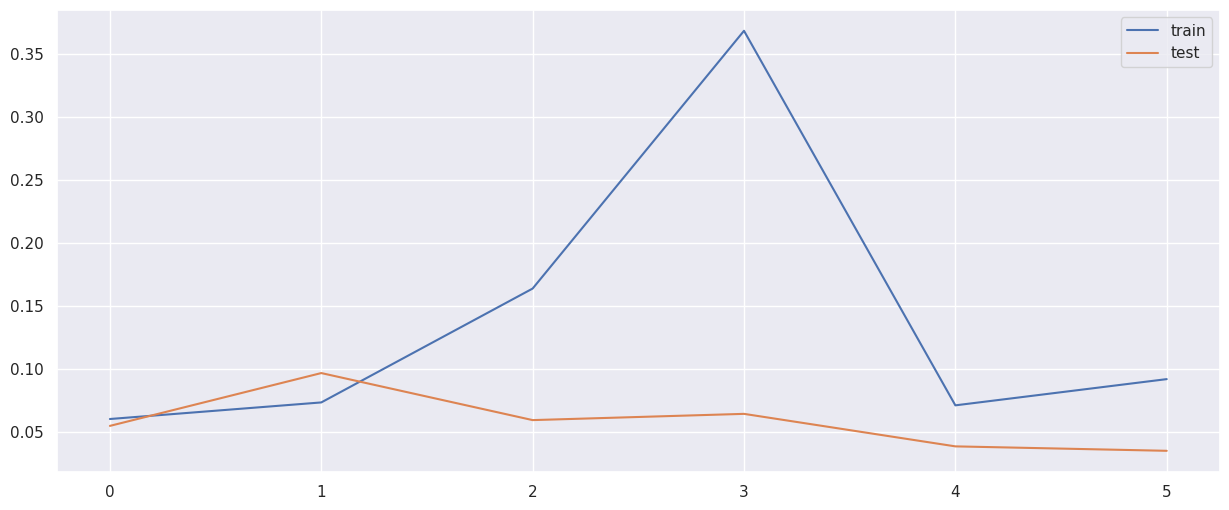

In [69]:
# plot and see the accuracy and loss
plt.plot(history.history["loss"],label = "train")
plt.plot(history.history["val_loss"],label = "test")
plt.legend()
plt.show()

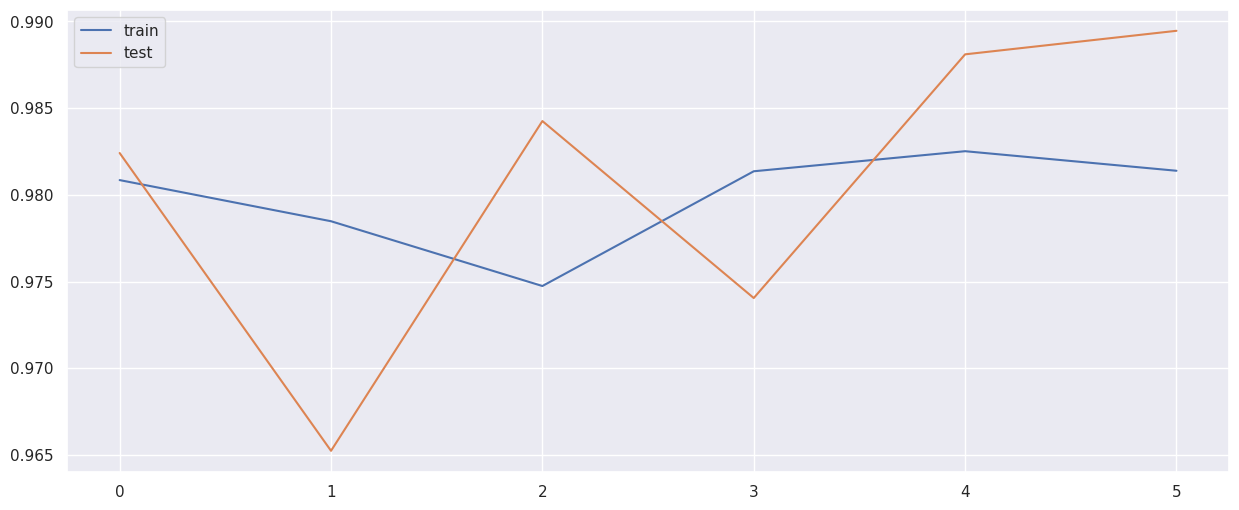

In [71]:
plt.plot(history.history["accuracy"],label = "train")
plt.plot(history.history["val_accuracy"],label = "test")
plt.legend()
plt.show()

<Axes: >

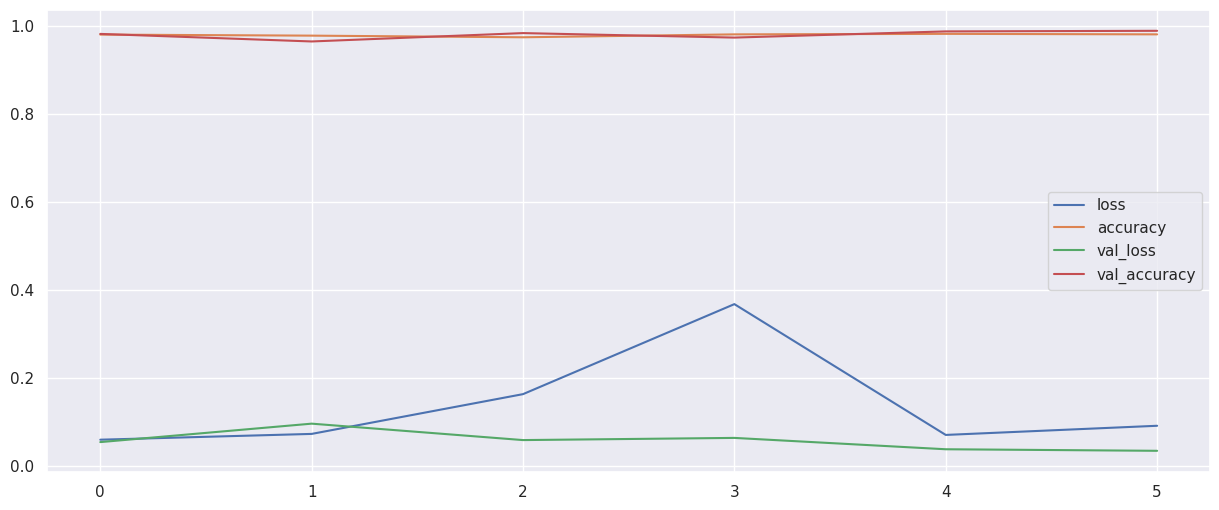

In [66]:
pd.DataFrame(history.history).plot()